In [146]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_percentage_error

In [147]:
df = pd.read_csv('diamonds.csv')

In [148]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [149]:
df.tail()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,53940,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64


In [150]:
df = df.drop('Unnamed: 0',axis =1)

In [151]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [153]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


# Data Visualistion

## Univariate analysis on price
### Distribution of price

C:\Users\Shivanjali Sharma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


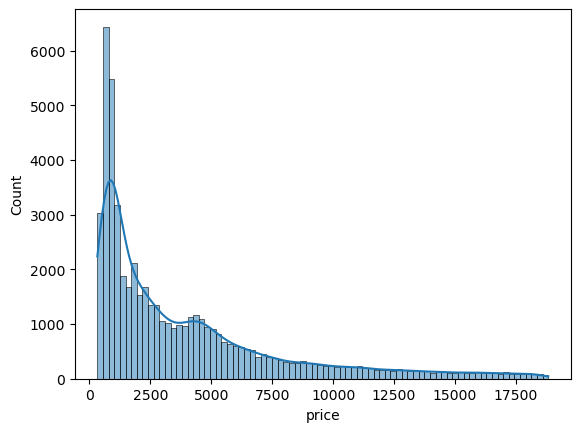

In [154]:
sns.histplot(data = df,x = 'price',kde = True)
plt.show()

C:\Users\Shivanjali Sharma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


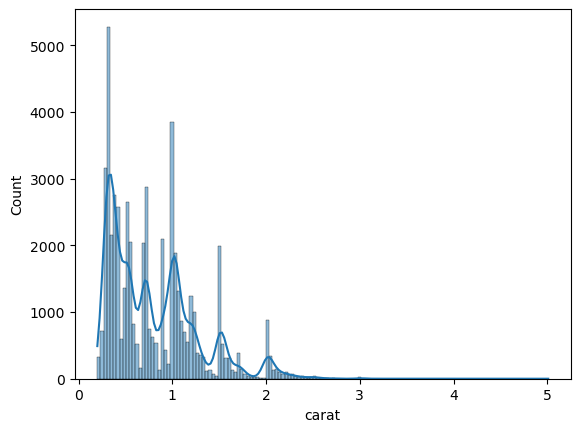

In [155]:
sns.histplot(data = df,x = 'carat',kde = True)
plt.show()

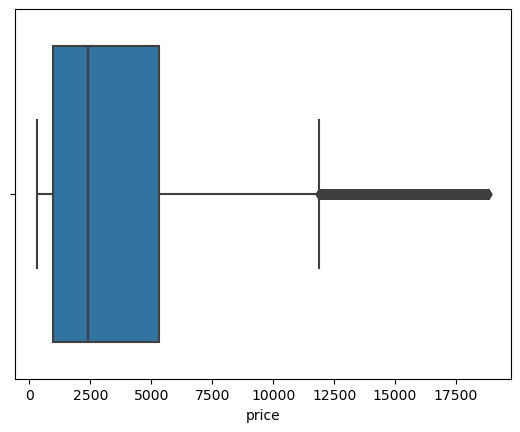

In [156]:
sns.boxplot(data = df,x = 'price')
plt.show()

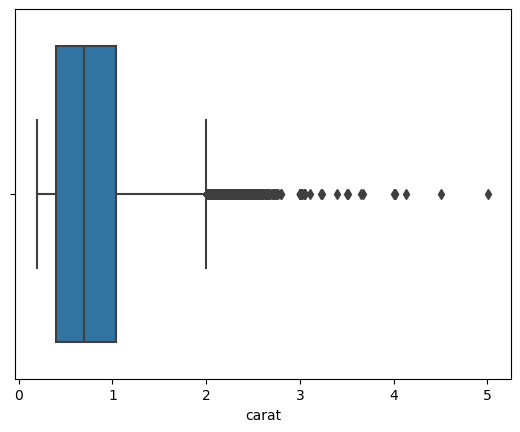

In [157]:
sns.boxplot(data = df,x = 'carat')
plt.show()

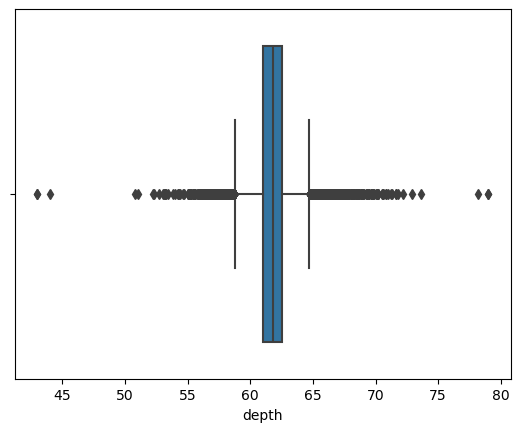

In [158]:
sns.boxplot(data = df,x = 'depth')
plt.show()

## Bivariate analysis

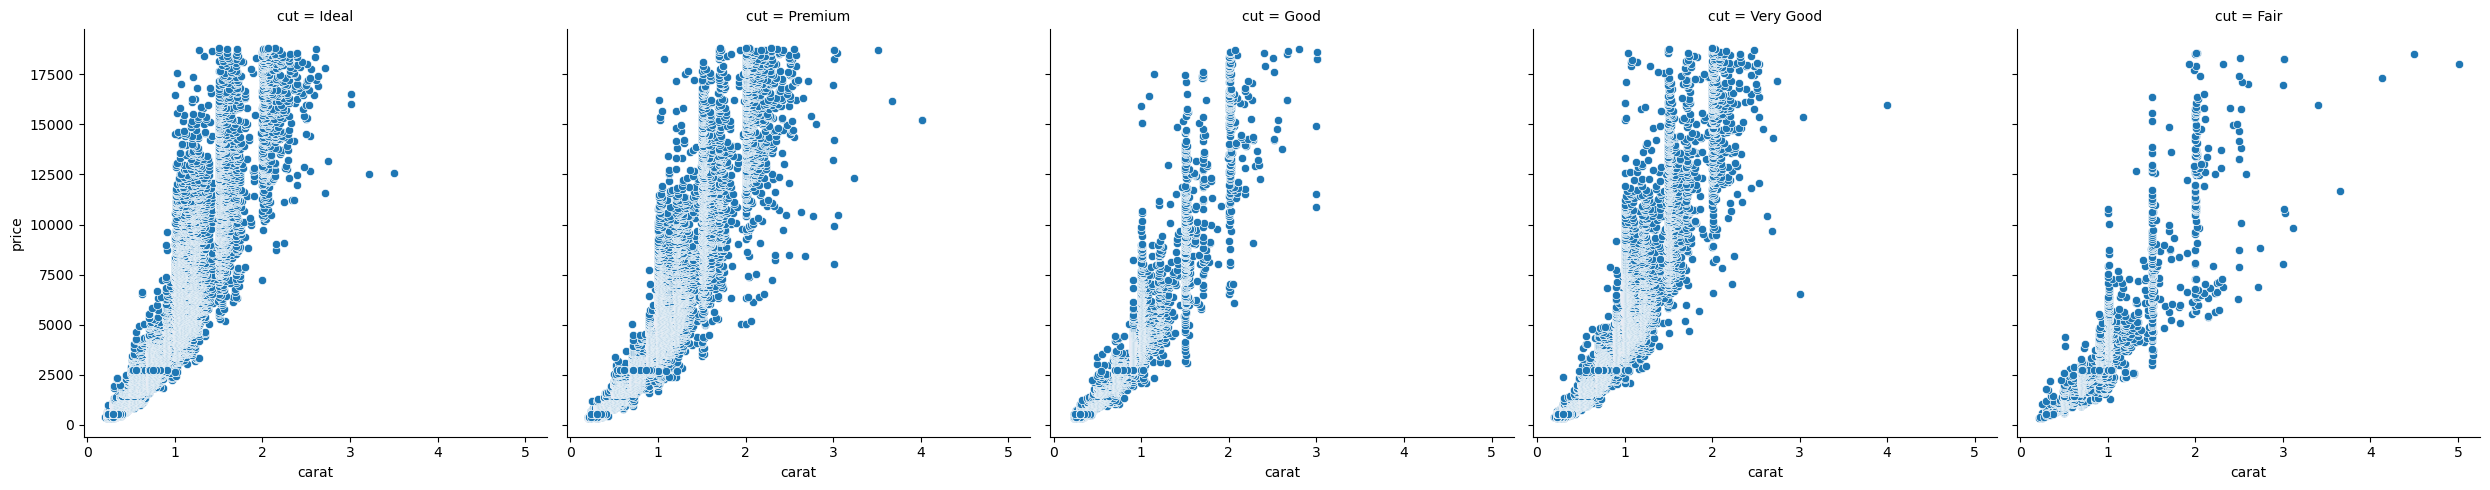

In [159]:
sns.relplot(data = df,x = 'carat',y = 'price',col = 'cut')
plt.show()

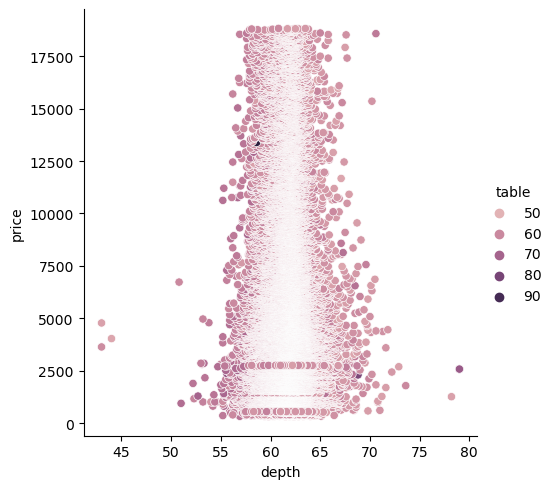

In [160]:
sns.relplot(data = df,kind = 'scatter',x = 'depth',y = 'price',hue = 'table')

## ValueColunt analysis on categorical columns

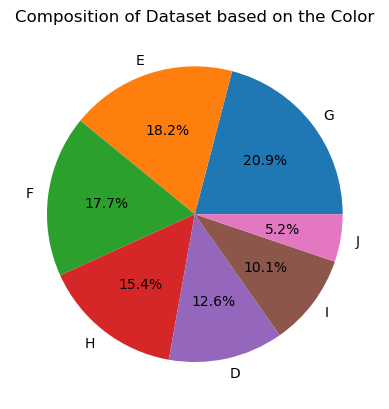

In [161]:
df['color'].value_counts().plot(kind = 'pie',autopct = '%1.1f%%')
plt.title("Composition of Dataset based on the Color")
plt.ylabel('')
plt.show()

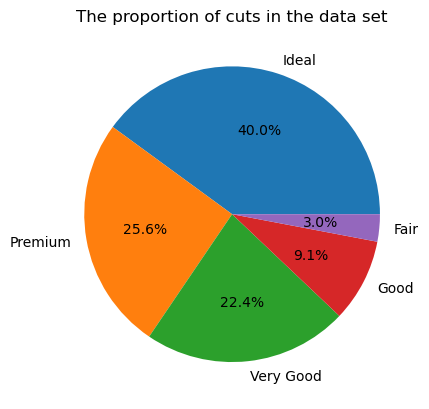

In [162]:
df['cut'].value_counts().plot(kind = 'pie',autopct = '%1.1f%%')
plt.title("The proportion of cuts in the data set")
plt.ylabel('')
plt.show()

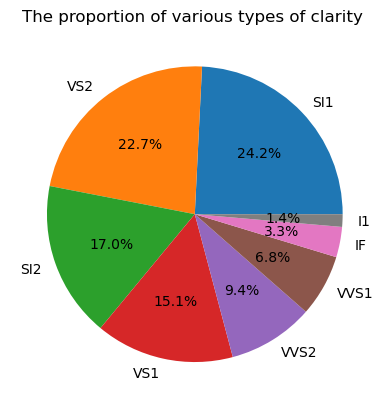

In [163]:
df['clarity'].value_counts().plot(kind = 'pie',autopct = '%1.1f%%')
plt.title('The proportion of various types of clarity ')
plt.ylabel('')
plt.show()

### lets check the average price by the category

In [164]:
df['price'].groupby([df['color'],df['cut']]).mean()

color  cut      
D      Fair         4291.061350
       Good         3405.382175
       Ideal        2629.094566
       Premium      3631.292576
       Very Good    3470.467284
E      Fair         3682.312500
       Good         3423.644159
       Ideal        2597.550090
       Premium      3538.914420
       Very Good    3214.652083
F      Fair         3827.003205
       Good         3495.750275
       Ideal        3374.939362
       Premium      4324.890176
       Very Good    3778.820240
G      Fair         4239.254777
       Good         4123.482204
       Ideal        3720.706388
       Premium      4500.742134
       Very Good    3872.753806
H      Fair         5135.683168
       Good         4276.254986
       Ideal        3889.334831
       Premium      5216.706780
       Very Good    4535.390351
I      Fair         4685.445714
       Good         5078.532567
       Ideal        4451.970377
       Premium      5946.180672
       Very Good    5255.879568
J      Fair         497

In [165]:
df['price'].groupby(df['clarity']).mean()

clarity
I1      3924.168691
IF      2864.839106
SI1     3996.001148
SI2     5063.028606
VS1     3839.455391
VS2     3924.989395
VVS1    2523.114637
VVS2    3283.737071
Name: price, dtype: float64

## Multivariate analysis

In [166]:
df.select_dtypes(include = 'number').corr()

,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


<Axes: >

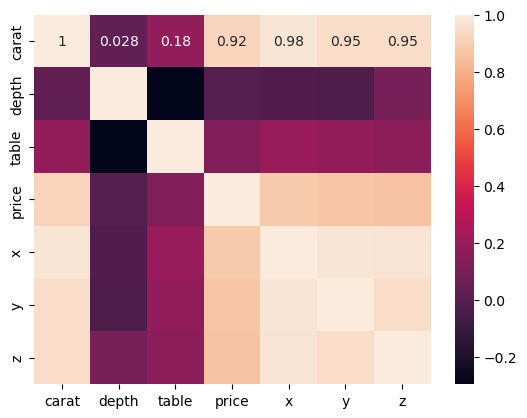

In [167]:
sns.heatmap(data = df.select_dtypes(include = 'number').corr(),annot = True )

# Data Preprocessing

## Data Cleaning

### Check for na values

In [168]:
df.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

### outlier filter

df_num = df.select_dtypes(include = 'number')

In [169]:
Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)

IQR = Q3-Q1

lower_bound = Q1-1.5*IQR
upper_bound = Q3+1.5*IQR

In [170]:
lower_bound

carat      -0.560
depth      58.750
table      51.500
price   -5611.375
x           1.965
y           1.990
z           1.215
dtype: float64

In [171]:
upper_bound

carat        2.000
depth       64.750
table       63.500
price    11885.625
x            9.285
y            9.270
z            5.735
dtype: float64

In [172]:
df = df[~((df_num<lower_bound)|(df_num>upper_bound)).any(axis=1)]

In [173]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48


<Axes: xlabel='price'>

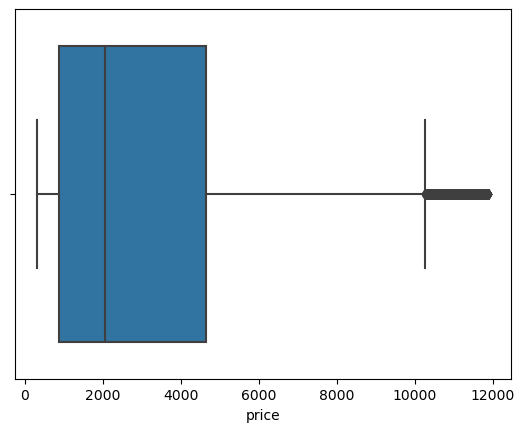

In [174]:
#Check for outliers
sns.boxplot(data = df,x = 'price')

<Axes: xlabel='carat'>

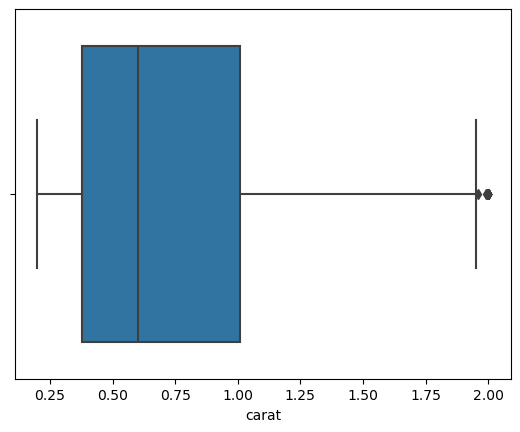

In [175]:
sns.boxplot(data = df,x = 'carat')

<Axes: xlabel='depth'>

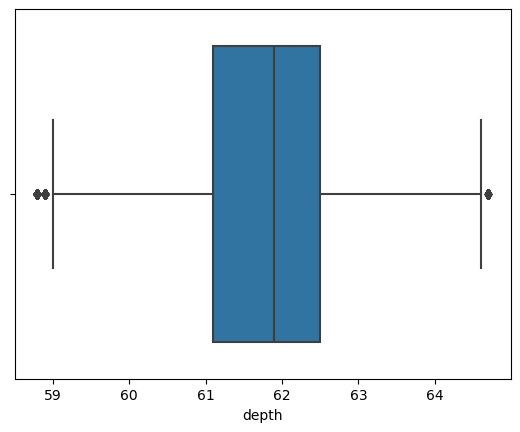

In [176]:
sns.boxplot(data = df,x = 'depth')

In [177]:
#Defining the X and y

X = df.drop('price',axis = 1)
y = df.price

In [178]:
X.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31
3,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,3.94,3.96,2.48


In [179]:
y.head()

0    326
1    326
3    334
4    335
5    336
Name: price, dtype: int64

In [180]:
X_num = X.select_dtypes(include = 'number')
X_cat = X.select_dtypes(include = 'object')

In [181]:
X_num.head()

,carat,depth,table,x,y,z
0,0.23,61.5,55.0,3.95,3.98,2.43
1,0.21,59.8,61.0,3.89,3.84,2.31
3,0.29,62.4,58.0,4.20,4.23,2.63
4,0.31,63.3,58.0,4.34,4.35,2.75
5,0.24,62.8,57.0,3.94,3.96,2.48


In [182]:
X_cat.head()

,cut,color,clarity
0,Ideal,E,SI2
1,Premium,E,SI1
3,Premium,I,VS2
4,Good,J,SI2
5,Very Good,J,VVS2


In [183]:
#Scaling the numerical columns

X_num_scaled = MinMaxScaler().fit_transform(X_num)

In [184]:
X_num_scaled

array([[0.01666667, 0.45762712, 0.26086957, 0.04835165, 0.06535948,
        0.2622108 ],
       [0.00555556, 0.16949153, 0.7826087 , 0.03516484, 0.03485839,
        0.23136247],
       [0.05      , 0.61016949, 0.52173913, 0.1032967 , 0.11982571,
        0.31362468],
       ...,
       [0.27777778, 0.6779661 , 0.69565217, 0.42417582, 0.43572985,
        0.55269923],
       [0.36666667, 0.37288136, 0.52173913, 0.53186813, 0.53159041,
        0.59897172],
       [0.30555556, 0.57627119, 0.26086957, 0.46153846, 0.47712418,
        0.57326478]])

In [185]:
X_num_scaled = pd.DataFrame(X_num_scaled,columns = X_num.columns,index = X_num.index) 

In [186]:
X_num_scaled.head()

,carat,depth,table,x,y,z
0,0.016667,0.457627,0.260870,0.048352,0.065359,0.262211
1,0.005556,0.169492,0.782609,0.035165,0.034858,0.231362
3,0.050000,0.610169,0.521739,0.103297,0.119826,0.313625
4,0.061111,0.762712,0.521739,0.134066,0.145969,0.344473
5,0.022222,0.677966,0.434783,0.046154,0.061002,0.275064


In [187]:
X_cat_encoded = pd.get_dummies(X_cat,drop_first = False,dtype = int)

In [188]:
X_cat_encoded

,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,color_F,color_G,color_H,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
4,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
5,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
53936,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
53937,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
53938,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0


In [189]:
X = pd.concat([X_num_scaled,X_cat_encoded],axis=1)

In [190]:
X.head()

,carat,depth,table,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.016667,0.457627,0.260870,0.048352,0.065359,0.262211,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0.005556,0.169492,0.782609,0.035165,0.034858,0.231362,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
3,0.050000,0.610169,0.521739,0.103297,0.119826,0.313625,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0
4,0.061111,0.762712,0.521739,0.134066,0.145969,0.344473,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
5,0.022222,0.677966,0.434783,0.046154,0.061002,0.275064,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1


In [191]:
y

0         326
1         326
3         334
4         335
5         336
         ... 
53935    2757
53936    2757
53937    2757
53938    2757
53939    2757
Name: price, Length: 47524, dtype: int64

In [192]:
#train,test,split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=42)

In [193]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((38019, 26), (9505, 26), (38019,), (9505,))

In [194]:
k_values = np.arange(1,22,2)
train_mape_values = []
test_mape_values = []
cv_mape_values = []

In [195]:
for i in k_values:
    
    #Training on the trian dataset
    model = KNeighborsRegressor(n_neighbors = i)
    model.fit(X_train,y_train)
    
    #Calculating the error in predicting the X_train
    pred_y_train = model.predict(X_train)
    error_train = mean_absolute_percentage_error(y_train,pred_y_train)
    train_mape_values.append(error_train)
    
    #Calculating the error in predicting the X_test
    pred_y_test = model.predict(X_test)
    error_test = mean_absolute_percentage_error(y_test,pred_y_test)
    test_mape_values.append(error_test)
    
    #Cv values
    CV_value = -cross_val_score(model,X,y,scoring='neg_mean_absolute_percentage_error',cv = 5)
    CV_mean = np.mean(CV_value)
    cv_mape_values.append(CV_mean)

In [196]:
k_values

array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21])

In [197]:
train_mape_values

[0.0001893854409030168,
 0.07379095025792212,
 0.0884830384351261,
 0.09718466641281502,
 0.10417267234812926,
 0.11082362341473018,
 0.11669778242970318,
 0.12272922152655315,
 0.12814514503645605,
 0.13421301925010673,
 0.13999882692716417]

In [198]:
test_mape_values

[0.12047561630539709,
 0.10974979172773289,
 0.11143904574447452,
 0.11554515704964488,
 0.11900208658184386,
 0.12315224958363004,
 0.12781051131342117,
 0.13216244030604174,
 0.1369893556017109,
 0.1421563110612401,
 0.14787420524515849]

In [199]:
cv_mape_values

[0.2760468732796883,
 0.25109458601027235,
 0.25595266085095014,
 0.2585124683116557,
 0.2626069162873026,
 0.2663862600354074,
 0.2715161981227822,
 0.27689367830446693,
 0.2821467157499035,
 0.2867464905826437,
 0.29097971335146666]

C:\Users\Shivanjali Sharma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Shivanjali Sharma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Shivanjali Sharma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Shivanjali Sharma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future ver

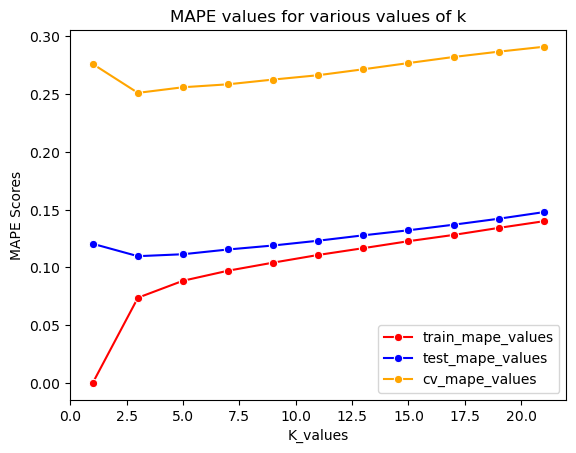

The best k_value:  3


In [200]:
sns.lineplot(x=k_values,y=train_mape_values,color = 'Red',marker = 'o',label = 'train_mape_values')
sns.lineplot(x=k_values,y=test_mape_values,color = 'blue',marker = 'o',label = 'test_mape_values')
sns.lineplot(x=k_values,y=cv_mape_values,color = 'orange',marker = 'o',label = 'cv_mape_values')
plt.xlabel('K_values')
plt.ylabel('MAPE Scores')
plt.title('MAPE values for various values of k')
plt.show()

best_k_cv = k_values[np.argmin(cv_mape_values)]
print("The best k_value: ",best_k_cv)

In [201]:
summary = pd.DataFrame(columns = ['Model','Train MAPE','Test MAPE'])
summary.loc[len(summary)] = pd.Series({'Model':'kNN Regression','Train MAPE':0.073,'Test MAPE':0.11})
summary

,Model,Train MAPE,Test MAPE
0,kNN Regression,0.073,0.11


### Decision Tree Regression

In [202]:
from sklearn.tree import DecisionTreeRegressor
model_dtr = DecisionTreeRegressor(random_state=42)

In [203]:
model_dtr.fit(X_train,y_train)

DecisionTreeRegressor(random_state=42)

In [204]:
y_train_pred = model_dtr.predict(X_train)

In [205]:
y_test_pred = model_dtr.predict(X_test)

In [206]:
train_mape = mean_absolute_percentage_error(y_train,y_train_pred)
test_mape = mean_absolute_percentage_error(y_test,y_test_pred)

In [207]:
train_mape,test_mape

(0.00018262767508981685, 0.08249987035539813)

## Tuning DTreeRegressor

In [213]:
parameters = {'splitter':['best','random'],
              'max_depth':[1,4,8,12,16,20,24,28,32,36,40],
             'min_samples_split':[2,6,10,14,18,22,26,30,34,38,42],
             'min_samples_leaf':[1,5,10,15,20,25,30,35],
             }

In [214]:
from sklearn.model_selection import GridSearchCV

In [215]:
tuning_model_dtr = GridSearchCV(model_dtr,param_grid = parameters,scoring = 'neg_mean_absolute_percentage_error',cv=5,verbose=0)

In [216]:
tuning_model_dtr.fit(X,y)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42),
             param_grid={'max_depth': [1, 4, 8, 12, 16, 20, 24, 28, 32, 36, 40],
                         'min_samples_leaf': [1, 5, 10, 15, 20, 25, 30, 35],
                         'min_samples_split': [2, 6, 10, 14, 18, 22, 26, 30, 34,
                                               38, 42],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_absolute_percentage_error')

In [217]:
tuning_model_dtr.best_params_

{'max_depth': 32,
 'min_samples_leaf': 5,
 'min_samples_split': 22,
 'splitter': 'random'}

In [218]:
tuning_model_dtr.best_score_

-0.20540886025419827

In [219]:
tuned_dtr = DecisionTreeRegressor(max_depth=32,min_samples_leaf = 5,min_samples_split = 22,splitter = 'random')

In [220]:
tuned_dtr.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=32, min_samples_leaf=5, min_samples_split=22,
                      splitter='random')

In [221]:
y_train_pred_tuned = tuned_dtr.predict(X_train)

In [222]:
y_test_pred_tuned = tuned_dtr.predict(X_test)

In [223]:
train_mape_tuned = mean_absolute_percentage_error(y_train,y_train_pred_tuned)
test_mape_tuned = mean_absolute_percentage_error(y_test,y_test_pred_tuned)

In [224]:
train_mape_tuned,test_mape_tuned

(0.06691624834196351, 0.08021368226700597)

In [225]:
summary.loc[len(summary)] = pd.Series({'Model':'Decision Tree Regressor','Train MAPE':0.068,'Test MAPE':0.08})
summary

,Model,Train MAPE,Test MAPE
0,kNN Regression,0.073,0.11
1,Decision Tree Regressor,0.068,0.08


In [226]:
from sklearn.linear_model import LinearRegression

In [227]:
lr = LinearRegression()

In [228]:
lr.fit(X_train,y_train)

LinearRegression()

In [229]:
y_pred_train_lr = lr.predict(X_train)

In [230]:
y_pred_test_lr = lr.predict(X_test)

In [231]:
train_mape_pred = mean_absolute_percentage_error(y_train,y_pred_train_lr)

In [232]:
test_mape_pred = mean_absolute_percentage_error(y_test,y_pred_test_lr)

In [233]:
train_mape_pred,test_mape_pred

(0.30665865628056166, 0.30068245601182886)

In [234]:
X

,carat,depth,table,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.016667,0.457627,0.260870,0.048352,0.065359,0.262211,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0.005556,0.169492,0.782609,0.035165,0.034858,0.231362,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
3,0.050000,0.610169,0.521739,0.103297,0.119826,0.313625,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0
4,0.061111,0.762712,0.521739,0.134066,0.145969,0.344473,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
5,0.022222,0.677966,0.434783,0.046154,0.061002,0.275064,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.288889,0.338983,0.434783,0.443956,0.453159,0.537275,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
53936,0.288889,0.728814,0.260870,0.430769,0.450980,0.565553,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
53937,0.277778,0.677966,0.695652,0.424176,0.435730,0.552699,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
53938,0.366667,0.372881,0.521739,0.531868,0.531590,0.598972,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
